# ****Import Libraries****

In [5]:
import numpy as np                 # linear algebra
import pandas as pd                # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, precision_score, recall_score, roc_curve


#for dirname, _, filenames in os.walk('/kaggle/input'):
 #   for filename in filenames:
  #      print(os.path.join(dirname, filename))

# ****Import Data****

In [6]:
# подгрузим данные для анализа
df=pd.read_csv('c:/project-new/train.csv')
print (df.shape)
# подгрузим данные для теста
df_test=pd.read_csv('c:/project-new/test.csv')
print (df_test.shape)

(70000, 13)
(30000, 12)


# ****Dataset Attributes****

Признаки
- id — индекс пациента
- age — возраст пациента
- gender — пол пациента
- height — рост пациента, см
- weight — вес пациента, кг
- ap_hi — систолическое давление(верхнее)
- ap_lo — диастолическое давление(нижнее)
- cholesterol — уровень холестерина
- gluc — уровень глюкозы
- smoke — курящий пациент
- alco — отношение к алкоголю у пациента
- active — физическая активность пациента

Целевой признак
- Cardio — risk of heart diseases


In [7]:
# посмотрим на данные
df.head(5)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [8]:
df_test.head(5)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
0,5,18888,1,154,85.0,130,80,1,1,0,0,1
1,6,19042,2,170,69.0,130,90,1,1,0,0,1
2,7,20432,1,160,70.0,120,75,1,1,0,0,0
3,10,18133,2,185,94.0,130,90,1,1,0,0,1
4,11,16093,2,170,76.0,120,80,1,1,0,0,1


In [9]:
# изучим сводную информацию о данных
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [10]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           30000 non-null  int64  
 1   age          30000 non-null  int64  
 2   gender       30000 non-null  int64  
 3   height       30000 non-null  int64  
 4   weight       30000 non-null  float64
 5   ap_hi        30000 non-null  int64  
 6   ap_lo        30000 non-null  int64  
 7   cholesterol  30000 non-null  int64  
 8   gluc         30000 non-null  int64  
 9   smoke        30000 non-null  int64  
 10  alco         30000 non-null  int64  
 11  active       30000 non-null  int64  
dtypes: float64(1), int64(11)
memory usage: 2.7 MB


In [11]:
# проверим датафрейм на пропуски
df.isna().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [12]:
df_test.isna().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
dtype: int64

In [13]:
# проверим датафрейм на дубликаты
df.duplicated().sum()

0

In [14]:
df_test.duplicated().sum()

0

In [15]:
# Поиск повторяющихся строк во всех столбцах
duplicateRows = df[df.duplicated ()]
duplicateRows

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio


In [16]:
duplicateRows = df_test[df_test.duplicated ()]
duplicateRows

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active


In [17]:
# сразу удалим id и посмотрим дубликаты
df.drop(columns='id', inplace=True)
df.head(5)

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [18]:
df_test.drop(columns='id', inplace=True)
df_test.head(5)

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
0,18888,1,154,85.0,130,80,1,1,0,0,1
1,19042,2,170,69.0,130,90,1,1,0,0,1
2,20432,1,160,70.0,120,75,1,1,0,0,0
3,18133,2,185,94.0,130,90,1,1,0,0,1
4,16093,2,170,76.0,120,80,1,1,0,0,1


In [19]:
# снова проверим датафрейм на дубликаты
df.duplicated().sum()

24

In [20]:
# вообще 24 из 70000 больших проблем не сделают, но все равно удалим их
df.drop_duplicates(inplace=True)
df.shape

(69976, 12)

In [21]:
df_test.duplicated().sum()

6

In [22]:
#df_test.drop_duplicates(inplace=True)
#df_test.shape

****Result of the Section:****
1. Все данные - численные. 
2. Пропусков в данных нет
3. Явных дубликатов нет.

# ****Data pre-processing****

In [23]:
# возраст пациента
df['age'].unique()

array([18393, 20228, 18857, ..., 14925, 17727, 17926], dtype=int64)

In [24]:
# преобразуем значения в возраст. Создадим отдельную колонку и удалим старую.
df['year'] = df['age'] / 365
df['year'] = df['year'].astype(np.int64)
df.drop(columns='age', inplace=True)
# проверим результат 
df.head(10)

,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,year
0,2,168,62.0,110,80,1,1,0,0,1,0,50
1,1,156,85.0,140,90,3,1,0,0,1,1,55
2,1,165,64.0,130,70,3,1,0,0,0,1,51
3,2,169,82.0,150,100,1,1,0,0,1,1,48
4,1,156,56.0,100,60,1,1,0,0,0,0,47
5,1,151,67.0,120,80,2,2,0,0,0,0,60
6,1,157,93.0,130,80,3,1,0,0,1,0,60
7,2,178,95.0,130,90,3,3,0,0,1,1,61
8,1,158,71.0,110,70,1,1,0,0,1,0,48
9,1,164,68.0,110,60,1,1,0,0,0,0,54


In [25]:
df_test['year'] = df_test['age'] / 365
df_test['year'] = df_test['year'].astype(np.int64)
df_test.drop(columns='age', inplace=True)
# проверим результат 
df_test.head(10)

,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,year
0,1,154,85.0,130,80,1,1,0,0,1,51
1,2,170,69.0,130,90,1,1,0,0,1,52
2,1,160,70.0,120,75,1,1,0,0,0,55
3,2,185,94.0,130,90,1,1,0,0,1,49
4,2,170,76.0,120,80,1,1,0,0,1,44
5,1,160,68.0,120,80,1,1,0,0,0,45
6,2,170,68.0,120,80,1,1,0,0,0,43
7,1,164,60.0,120,80,1,1,0,0,0,55
8,1,170,68.0,110,70,1,1,0,0,1,55
9,1,162,88.0,180,100,2,2,0,1,1,59


In [26]:
print (df['year'].describe())
print('')
print (df_test['year'].describe())

count    69976.000000
mean        52.840874
std          6.767103
min         29.000000
25%         48.000000
50%         53.000000
75%         58.000000
max         64.000000
Name: year, dtype: float64

count    30000.000000
mean        52.802900
std          6.793987
min         24.000000
25%         48.000000
50%         53.000000
75%         58.000000
max         64.000000
Name: year, dtype: float64


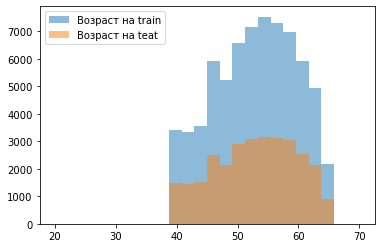

In [27]:
bins = np.linspace(20, 70, 25)
plt.hist(df['year'], bins, alpha = 0.5, label='Возраст на train')
plt.hist(df_test['year'], bins, alpha = 0.5, label='Возраст на teat')
plt.legend(loc='upper left')
plt.show()

In [28]:
# пол пациента
df['gender'].unique()

array([2, 1], dtype=int64)

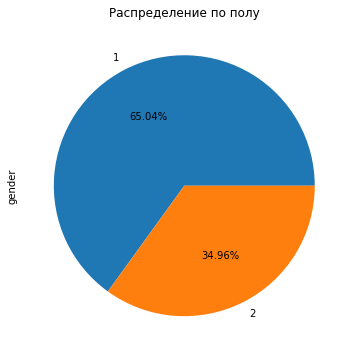

In [29]:
df['gender'].value_counts().plot.pie(legend=False, autopct='%1.2f%%', figsize=(12,6))
plt.title('Распределение по полу')
plt.show()

In [30]:
# рост пациента, см
print (df['height'].value_counts())
print (df['height'].unique())

165    5843
160    5019
170    4678
168    4398
164    3393
       ... 
112       1
98        1
74        1
119       1
57        1
Name: height, Length: 109, dtype: int64
[168 156 165 169 151 157 178 158 164 173 181 172 170 154 162 163 153 159
 166 155 160 175 171 152 187 148 179 180 188 185 167 183 174 176 161 184
 177 182  76 149 142 150 144 147 186 146 141 195 140 198 145 143 196 138
 194 190 134 136 100 120 189 137 192 122 250 191 117  70  97 119 130 110
 193  75 132  71 135  67 125 139 133  74  98 112 207  68  55  81  80  64
  91  60 109  72 197  65 128 105 108 200 104 111 113  96 131  59  66  99
  57]


In [31]:
print (df['height'].describe())
print ('')
print (df_test['height'].describe())

count    69976.000000
mean       164.359152
std          8.211218
min         55.000000
25%        159.000000
50%        165.000000
75%        170.000000
max        250.000000
Name: height, dtype: float64

count    30000.000000
mean       164.322267
std          8.213740
min         50.000000
25%        159.000000
50%        165.000000
75%        170.000000
max        198.000000
Name: height, dtype: float64


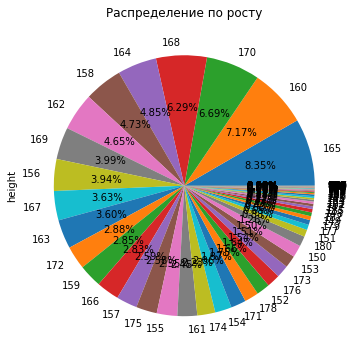

In [32]:
df['height'].value_counts().plot.pie(legend=False, autopct='%1.2f%%', figsize=(12,6))
plt.title('Распределение по росту')
plt.show()

In [33]:
# вес пациента, кг
print (df['weight'].value_counts())
print (df['weight'].unique())

65.0    3843
70.0    3761
68.0    2829
75.0    2739
60.0    2707
        ... 
92.2       1
75.6       1
82.9       1
23.0       1
99.9       1
Name: weight, Length: 287, dtype: int64
[ 62.    85.    64.    82.    56.    67.    93.    95.    71.    68.
  80.    60.    78.   112.    75.    52.    83.    69.    90.    45.
  65.    59.    66.    74.   105.    73.    55.    70.    72.    63.
  50.   107.    84.    77.    79.    76.    58.   115.    97.    53.
  57.    49.   110.    94.    92.    87.   103.    88.    99.   100.
  61.    48.    54.    51.    47.    91.   104.    81.    98.   108.
  89.   101.    86.    65.5  142.    96.    44.    41.   169.   116.
 200.    64.8  120.   117.   125.   106.   114.   113.   129.   124.
  42.   123.   111.   102.   109.    46.   139.   150.   138.   131.
  43.    83.6  134.   106.5  121.    40.   141.   119.   126.   177.
 165.   122.    62.3  118.    89.5  132.   155.   130.   159.    84.6
 140.    82.3   30.    67.9  127.    67.5   74.3  149.   

In [34]:
print (df['weight'].describe())
print ('')
print (df_test['height'].describe())

count    69976.000000
mean        74.208519
std         14.397211
min         10.000000
25%         65.000000
50%         72.000000
75%         82.000000
max        200.000000
Name: weight, dtype: float64

count    30000.000000
mean       164.322267
std          8.213740
min         50.000000
25%        159.000000
50%        165.000000
75%        170.000000
max        198.000000
Name: height, dtype: float64


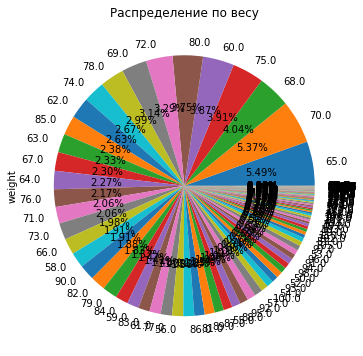

In [35]:
df['weight'].value_counts().plot.pie(legend=False, autopct='%1.2f%%', figsize=(12,6))
plt.title('Распределение по весу')
plt.show()

In [36]:
# систолическое давление(верхнее)
print (df['ap_hi'].value_counts())
print (df['ap_hi'].unique())

 120     27676
 140      9506
 130      8961
 110      8643
 150      4450
         ...  
 1620        1
 199         1
-150         1
-115         1
 2000        1
Name: ap_hi, Length: 153, dtype: int64
[  110   140   130   150   100   120   145   170   135   125    90   180
   160   133   190    80   122   169   126   158   200    14   123    70
   161   147   115   137   153    11   148   105   220   119   141   165
   164    12   124   172   902   162   906   117   134   166   210   176
   116    10   121    16   112   159   113   118   155   142   131   157
   136   146   138  -100   909   109    85   106   129    93     7    95
   179   156   168   132   104   103   178   175   128   151    15   139
 11500   127    17   108   144   102     1  1420    13   143   701   107
   184   149   167   114   101    60  1500   181   171   202  -115   111
   907    20   188   185   163   173   154   177  -140   174  -120 14020
  1400   240   191   197  1620   152    96   199  -150  1130   193

In [37]:
print (df['ap_hi'].describe())
print ('')
print (df_test['ap_hi'].describe())

count    69976.000000
mean       128.820453
std        154.037729
min       -150.000000
25%        120.000000
50%        120.000000
75%        140.000000
max      16020.000000
Name: ap_hi, dtype: float64

count    30000.000000
mean       130.271300
std        212.501152
min       -130.000000
25%        120.000000
50%        120.000000
75%        140.000000
max      16020.000000
Name: ap_hi, dtype: float64


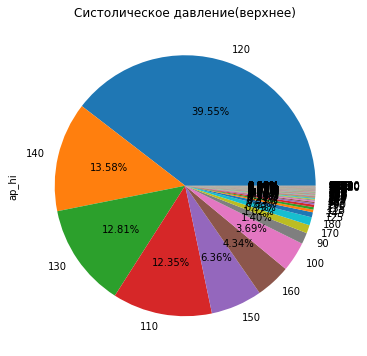

In [38]:
df['ap_hi'].value_counts().plot.pie(legend=False, autopct='%1.2f%%', figsize=(12,6))
plt.title('Систолическое давление(верхнее)')
plt.show()

In [39]:
# диастолическое давление(нижнее)
print (df['ap_lo'].value_counts())
print (df['ap_lo'].unique())

80     34824
90     14316
70     10244
100     4082
60      2727
       ...  
56         1
182        1
810        1
9          1
602        1
Name: ap_lo, Length: 157, dtype: int64
[   80    90    70   100    60    85    89   110    65    63    79  1100
  1000   800   120    50    30   109    84  1033   150    91    40    73
    78    75    86    87  1001    82    95    69    74    97    81  1200
    83   119     0    93   105 10000    99    77    59  8044   140    92
  1044   108   125   115    68    61   106   102    94    66    52   170
    76   160    62    96   130   113    67  9100    10    88   902     8
   112   104    71    72  1008    98  2088    20   802  8000  1022   850
   708    57   101  9011  1011    64  1007  1177  7100    45   709  8500
    58  1110  8099  1088   126  1077  1120     7   103  1125   180   121
  8100   710  5700  8079  1111  1003     6  1900   809   114   801  1002
    53   111     1   118    56   182   810     9  7099 11000  9800  8200
  1139   107   

In [40]:
print (df['ap_lo'].describe())
print ('')
print (df_test['ap_lo'].describe())

count    69976.000000
mean        96.636261
std        188.504581
min        -70.000000
25%         80.000000
50%         80.000000
75%         90.000000
max      11000.000000
Name: ap_lo, dtype: float64

count    30000.000000
mean        95.689000
std        163.852598
min        -90.000000
25%         80.000000
50%         80.000000
75%         90.000000
max       9100.000000
Name: ap_lo, dtype: float64


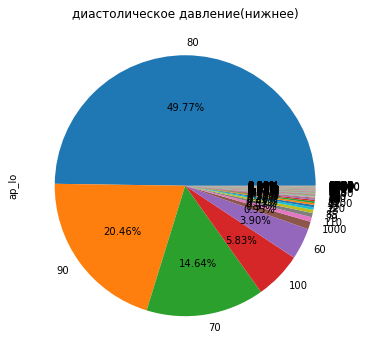

In [41]:
df['ap_lo'].value_counts().plot.pie(legend=False, autopct='%1.2f%%', figsize=(12,6))
plt.title('диастолическое давление(нижнее)')
plt.show()

In [42]:
# уровень холестерина
print (df['cholesterol'].value_counts())
print (df['cholesterol'].unique())

1    52361
2     9549
3     8066
Name: cholesterol, dtype: int64
[1 3 2]


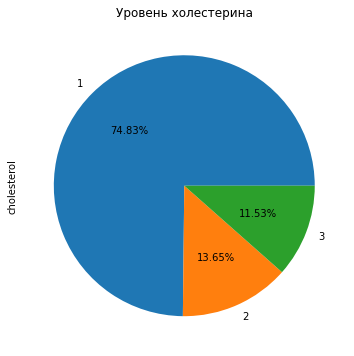

In [43]:
df['cholesterol'].value_counts().plot.pie(legend=False, autopct='%1.2f%%', figsize=(12,6))
plt.title('Уровень холестерина')
plt.show()

In [44]:
# уровень глюкозы
print (df['gluc'].value_counts())
print (df['gluc'].unique())

1    59455
3     5331
2     5190
Name: gluc, dtype: int64
[1 2 3]


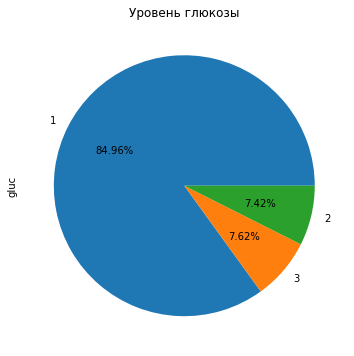

In [45]:
df['gluc'].value_counts().plot.pie(legend=False, autopct='%1.2f%%', figsize=(12,6))
plt.title('Уровень глюкозы')
plt.show()

In [46]:
# курящий пациент
print (df['smoke'].value_counts())
print (df['smoke'].unique())

0    63807
1     6169
Name: smoke, dtype: int64
[0 1]


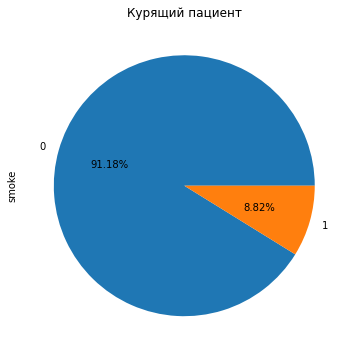

In [47]:
df['smoke'].value_counts().plot.pie(legend=False, autopct='%1.2f%%', figsize=(12,6))
plt.title('Курящий пациент')
plt.show()

In [48]:
# отношение к алкоголю у пациента
print (df['alco'].value_counts())
print (df['alco'].unique())

0    66212
1     3764
Name: alco, dtype: int64
[0 1]


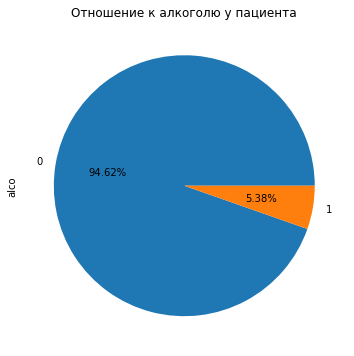

In [49]:
df['alco'].value_counts().plot.pie(legend=False, autopct='%1.2f%%', figsize=(12,6))
plt.title('Отношение к алкоголю у пациента')
plt.show()

In [50]:
# физическая активность пациента
print (df['active'].value_counts())
print (df['active'].unique())

1    56241
0    13735
Name: active, dtype: int64
[1 0]


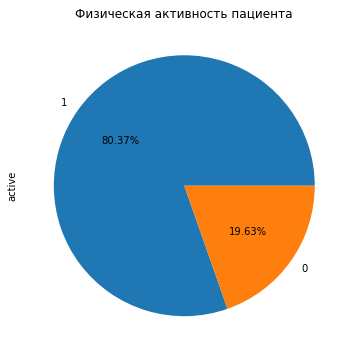

In [51]:
df['active'].value_counts().plot.pie(legend=False, autopct='%1.2f%%', figsize=(12,6))
plt.title('Физическая активность пациента')
plt.show()

In [52]:
# риск сердечных заболеваний
print (df['cardio'].value_counts())
print (df['cardio'].unique())

0    35004
1    34972
Name: cardio, dtype: int64
[0 1]


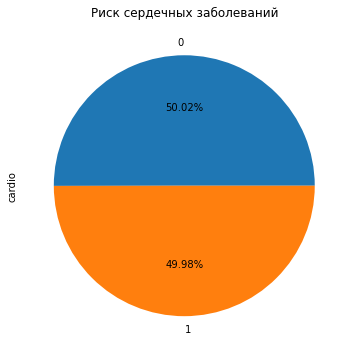

In [53]:
df['cardio'].value_counts().plot.pie(legend=False, autopct='%1.2f%%', figsize=(12,6))
plt.title('Риск сердечных заболеваний')
plt.show()

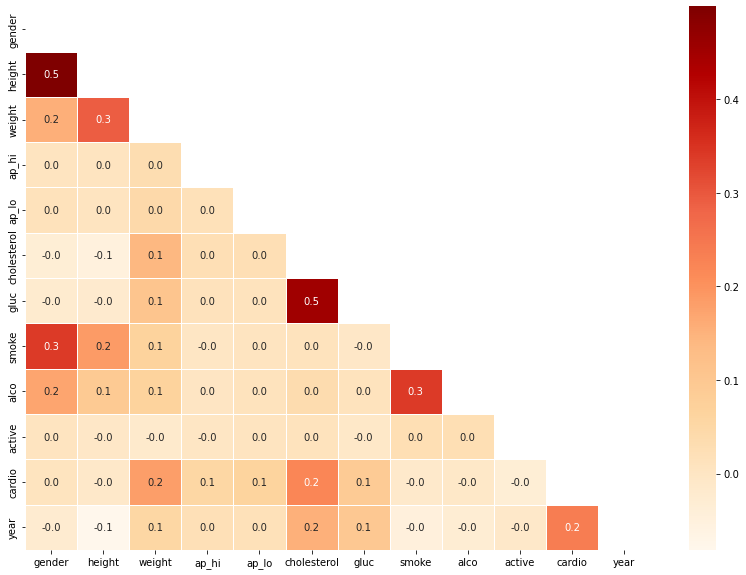

In [54]:
plt.figure(figsize = (14,10))
mask = np.triu(df.corr())
sns.heatmap(df.corr(), annot = True, fmt = ".1f", linewidths = .7,cmap="OrRd", mask = mask)
plt.show()

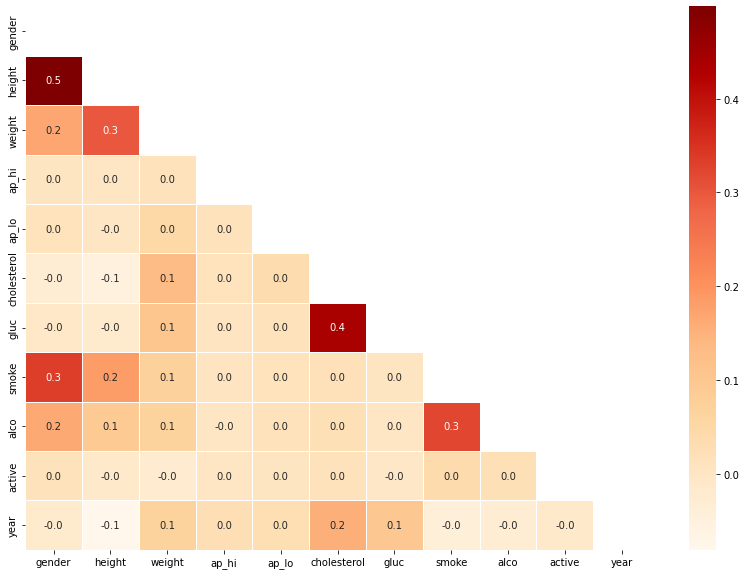

In [55]:
plt.figure(figsize = (14,10))
mask = np.triu(df_test.corr())
sns.heatmap(df_test.corr(), annot = True, fmt = ".1f", linewidths = .7,cmap="OrRd", mask = mask)
plt.show()

****Result of the Section:****
1. Значения "Возраст" преобразованны. 
2. В эти данных 'height', 'weight', 'ap_hi', 'ap_lo', 'year' явно есть выбросы.
3. Корреляция: age|year = 1 (логично т.к. на основе age создали year)
               cholesterol|gluc = 0.5 (как правило это показатели сахарного диабета или преддивбета)
               gender|height = 0.5 (в данных происходит количественное преобладание одного пола над 
               другим; мужчины по статистики выше женщин).

In [56]:
df.shape

(69976, 12)

# ****Checking for outliers****

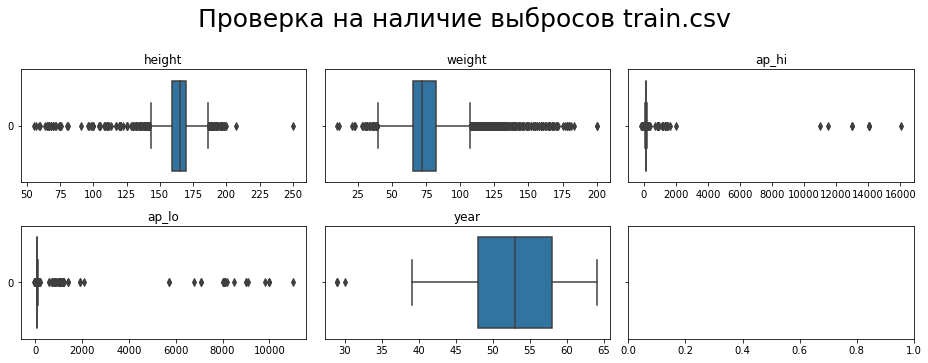

In [57]:
# проводим проверку на выбросы ранее замеченных значений
numerical_columns = list(df.loc[:,['height', 'weight', 'ap_hi', 'ap_lo', 'year']])

def boxplots_custom(dataset, columns_list, rows, cols, suptitle):
    fig, axs = plt.subplots(rows, cols, sharey=True, figsize=(13,5))
    fig.suptitle(suptitle,y=1, size=25)
    axs = axs.flatten()
    for i, data in enumerate(columns_list):
        sns.boxplot(data=dataset[data], orient='h', ax=axs[i])
        axs[i].set_title(data)
        
boxplots_custom(dataset=df, columns_list=numerical_columns, rows=2, cols=3, 
                suptitle='Проверка на наличие выбросов train.csv')
plt.tight_layout()

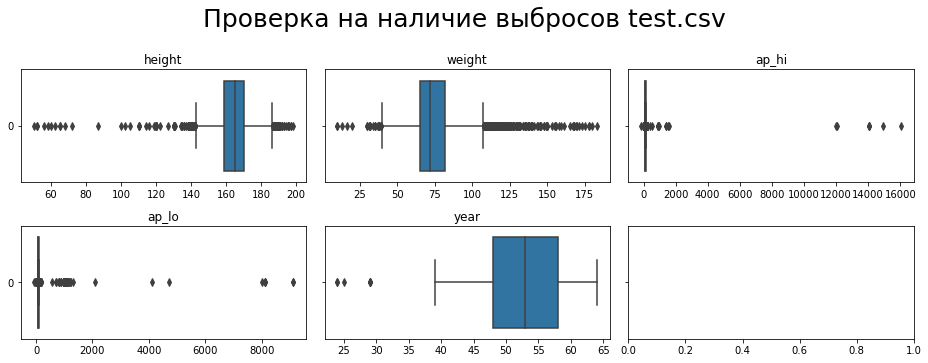

In [58]:
boxplots_custom(dataset=df_test, columns_list=numerical_columns, rows=2, cols=3, 
                suptitle='Проверка на наличие выбросов test.csv')
plt.tight_layout()

In [59]:
# Функция для подсчёта границ с учетом 1.5 размаха
def quartile_range(df, column):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    dfq = df.loc[(df[column] < q3 + 1.5*iqr) & (df[column] > q1 - 1.5*iqr), column]
    return dfq
# Столбцы с выбросами
list_features = ['height', 'weight', 'ap_hi', 'ap_lo', 'year']
for col in list_features:
    df[col] = quartile_range(df, col)
    df_test[col] = quartile_range(df_test, col)

In [60]:
# проверяем
(
    df[['height', 'weight', 'ap_hi', 'ap_lo', 'year']]
    .apply (['count', 'min', 'max'])   
    .style.format("{:,.2f}")
)

,height,weight,ap_hi,ap_lo,year
count,"69,457.00","68,157.00","66,842.00","65,246.00","69,972.00"
min,143.00,40.00,93.00,66.00,39.00
max,186.00,107.00,169.00,104.00,64.00


In [61]:
(
    df_test[['height', 'weight', 'ap_hi', 'ap_lo', 'year']]
    .apply (['count', 'min', 'max'])   
    .style.format("{:,.2f}")
)

,height,weight,ap_hi,ap_lo,year
count,"29,784.00","29,225.00","28,707.00","28,040.00","29,993.00"
min,143.00,40.00,91.00,66.00,39.00
max,186.00,107.00,169.00,104.00,64.00


****Result of the Section:****
С выбросами справились

In [62]:
df.shape

(69976, 12)

# ****Data processing****

****Подготовка данных****

In [63]:
# проверим дисбаланс
df['cardio'].value_counts()

0    35004
1    34972
Name: cardio, dtype: int64

In [64]:
# целевой признак
target = df['cardio']
# признаки
features = df.drop(['cardio'], axis=1) 
#features_test = df_test 

In [65]:
# разобьем исходные данные на две выборки: обучающую и тестовую (70% / 30%)
features_train, features_test, target_train, target_test = train_test_split(features, 
                                                                            target, 
                                                                            stratify=target, 
                                                                            test_size = 0.3, 
                                                                            random_state = 12345)
print(features_train.shape, features_test.shape)
print(target_train.shape, target_test.shape)

(48983, 11) (20993, 11)
(48983,) (20993,)


In [66]:
features_train.fillna(0, inplace=True)
features_test.fillna(0, inplace=True)

In [67]:
# стандартизируем (масштабируем) признаки
numeric = ['gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc',
       'smoke', 'alco', 'active', 'year']
scaler = StandardScaler()
scaler.fit(features_train[numeric])
features_train[numeric] = scaler.transform(features_train[numeric])
features_test[numeric] = scaler.transform(features_test[numeric])
# проверим результат
features_train.head(5)

,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,year
4747,-0.734423,-0.204284,0.343585,-0.025052,0.164532,-0.539401,-0.395775,-0.312031,-0.236952,0.492953,0.617976
33596,1.361612,0.488255,0.934445,1.166510,0.619425,2.401713,-0.395775,-0.312031,4.220270,0.492953,0.323064
45702,-0.734423,-0.015410,0.048155,-0.025052,0.164532,-0.539401,-0.395775,-0.312031,-0.236952,0.492953,-0.856582
32268,-0.734423,-0.582032,-0.483619,-0.025052,0.164532,-0.539401,-0.395775,-0.312031,-0.236952,0.492953,-0.266759
345,-0.734423,-0.582032,0.579929,0.655841,-3.474613,0.931156,-0.395775,-0.312031,-0.236952,0.492953,-0.266759


****Выбор модели по лучшим показателям****


In [68]:
%%time
# определяем вид модели и ее гиперпараметры
model_lr = LogisticRegression(random_state=12345, solver='liblinear', class_weight='balanced')

# обучаем модель на обучающем наборе данных
model_lr.fit(features_train, target_train)

# предсказания модели
prediction_lr = model_lr.predict(features_test)

print("Accuracy:    {:.4f}".format(model_lr.score(features_train, target_train)))
print("Recall:      {:.4f}".format(recall_score(target_test, prediction_lr)))
print("Precision:   {:.4f}".format(precision_score(target_test, prediction_lr)))
print("F1:          {:.4f}".format(f1_score(target_test, prediction_lr)))

probavilities_valid_lr = model_lr.predict_proba(features_train)
probavilities_one_valid_lr = probavilities_valid_lr[:,1]
print("ROC_auc:     {:.4f}".format(roc_auc_score(target_train, probavilities_one_valid_lr)))

print('')
score_lr = cross_val_score(model_lr, features_train, target_train, cv=5, scoring='recall').mean()
print('Кросс-валидация Recall:  {:.4f}'.format(score_lr))

Accuracy:    0.6536
Recall:      0.6347
Precision:   0.6557
F1:          0.6450
ROC_auc:     0.7040

Кросс-валидация Recall:  0.6362
CPU times: total: 1.02 s
Wall time: 675 ms


In [69]:
%%time
best_model3 = None
best_rezult3 = 0
best_depth3 = 0
best_est3 = 0
for estimator in range(10, 30, 10):
    for depth in range(1, 20):
        # определяем вид модели и ее гиперпараметры
        model_rf = RandomForestClassifier(random_state=12345, n_estimators=estimator, 
                                           max_depth = depth, class_weight='balanced')
    
        # обучаем модель на обучающем наборе данных
        model_rf.fit(features_train, target_train)
    
        # предсказания модели
        prediction_rf = model_rf.predict(features_test)
    
        # находим F1-меру
        rezult3 = f1_score(target_test, prediction_rf)
                
        if best_rezult3 < rezult3:
            best_model3 = model_rf
            best_rezult3 = rezult3
            best_depth3 = depth
            best_est3 = estimator

print("Accuracy:    {:.4f}".format(model_rf.score(features_train, target_train)))
print("Recall:      {:.4f}".format(recall_score(target_test, prediction_rf)))
print("Precision:   {:.4f}".format(precision_score(target_test, prediction_rf)))
print("F1:          {:.4f}".format(best_rezult3), 'cо значением глубины =', best_depth3, 'количество деревьев =', best_est3)    

probavilities_valid_rf = model_rf.predict_proba(features_train)
probavilities_one_valid_rf = probavilities_valid_rf[:,1]
print("ROC_auc:     {:.4f}".format(roc_auc_score(target_train, probavilities_one_valid_rf)))

print('')            
score_rf = cross_val_score(model_rf, features_train, target_train, cv=5, scoring='recall').mean() 
print('Кросс-валидация Recall:  {:.4f}'.format(score_rf))

Accuracy:    0.8820
Recall:      0.6862
Precision:   0.7385
F1:          0.7229 cо значением глубины = 14 количество деревьев = 20
ROC_auc:     0.9507

Кросс-валидация Recall:  0.6837
CPU times: total: 22.7 s
Wall time: 25.1 s


In [70]:
%%time
best_model2 = None
best_rezult2 = 0
for depth in range(1, 10):
    # определяем вид модели и ее гиперпараметры
    model_df = DecisionTreeClassifier(random_state=12345, max_depth=depth, class_weight='balanced')
    
    # обучаем модель на обучающем наборе данных
    model_df.fit(features_train, target_train)
    
    # предсказания модели
    prediction_df = model_df.predict(features_test)

    # находим F1-меру
    rezult2 = f1_score(target_test, prediction_df)
    
    if best_rezult2 < rezult2:
        best_rezult2 = rezult2
        max_depth2 = depth
        best_model2 = model_df
    
print("Accuracy:    {:.4f}".format(model_df.score(features_train, target_train)))
print("Recall:      {:.4f}".format(recall_score(target_test, prediction_df)))
print("Precision:   {:.4f}".format(precision_score(target_test, prediction_df)))
print("F1:          {:.4f}".format(best_rezult2), 'cо значением глубины =', max_depth2)    

probavilities_valid_df = model_df.predict_proba(features_train)
probavilities_one_valid_df = probavilities_valid_df[:,1]
print("ROC_auc:     {:.4f}".format(roc_auc_score(target_train, probavilities_one_valid_df)))

print('')
score_df = cross_val_score(model_df, features_train, target_train, cv=5, scoring='recall').mean()
print('Кросс-валидация Recall:  {:.4f}'.format(score_df))

Accuracy:    0.7411
Recall:      0.6930
Precision:   0.7391
F1:          0.7153 cо значением глубины = 9
ROC_auc:     0.8109

Кросс-валидация Recall:  0.6755
CPU times: total: 1.17 s
Wall time: 1.18 s


In [71]:
#Функция для сверки результатов
best_metrics = pd.DataFrame(data=[('Logistic Regression', model_lr.score(features_train, target_train), 
                                  recall_score(target_test, prediction_lr), 
                                  precision_score(target_test, prediction_lr),
                                  f1_score(target_test, prediction_lr),
                                  roc_auc_score(target_train, probavilities_one_valid_lr),
                                  score_lr),
                                  ('Decision Tree Classifier', model_df.score(features_train, target_train), 
                                  recall_score(target_test, prediction_df),
                                  precision_score(target_test, prediction_df),
                                  best_rezult2,
                                  roc_auc_score(target_train, probavilities_one_valid_df),
                                  score_df),
                                  ('Random Forest Classifier', model_rf.score(features_train, target_train), 
                                  recall_score(target_test, prediction_rf), 
                                  precision_score(target_test, prediction_rf),
                                  f1_score(target_test, prediction_rf),
                                  roc_auc_score(target_train, probavilities_one_valid_rf),
                                  score_rf)
                                 ],                                  
                                 columns=['Model', 'Accuracy', 'Recall', 'Precision','F1','ROC_auc', 'Кросс-валидация Recall'])
best_metrics

,Model,Accuracy,Recall,Precision,F1,ROC_auc,Кросс-валидация Recall
0,Logistic Regression,0.653553,0.634674,0.655736,0.645033,0.703976,0.636193
1,Decision Tree Classifier,0.741073,0.693004,0.739148,0.715333,0.810915,0.675531
2,Random Forest Classifier,0.882000,0.686237,0.738537,0.711427,0.950705,0.683742


***Оновываясь на данных победила модель Random Forest Classifier***

In [72]:
df_test.fillna(0, inplace=True)
df.fillna(0, inplace=True)

In [73]:
model_best = RandomForestClassifier(random_state=12345, n_estimators=11, 
                                           max_depth = 20, class_weight='balanced')
    
# обучаем модель на обучающем наборе данных
model_best.fit(features_train, target_train)
 
# предсказания модели
predictions_best = model_best.predict(features_test)

pred = model_best.predict_proba(df_test)
pred = pred[:,1]

In [74]:
pred.shape

(30000,)

In [94]:
import pickle

In [95]:
from pickle import dump, load
with open("c:/project-new/model.pcl", "wb") as fid:
     dump(model_best, fid)

In [76]:
#df_itog=pd.read_csv('/kaggle/input/yap15-heart-diseases-predictions/sample_submission.csv')
#print (df_itog.shape)

In [77]:
#df_itog.head(10)

In [78]:
#df_itog['cardio']=pred
#df_itog = df_itog[['id','cardio']]

In [79]:
#df_itog.head(10)

In [80]:
#df_itog.to_csv('/kaggle/working/submission.csv', index=False)